In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder

In [2]:

student_dataset=pd.read_csv('student_habits_performance.csv')

In [3]:
student_dataset.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
student_dataset.shape

(1000, 16)

In [5]:
student_dataset.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
student_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   int64  
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
student_dataset.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
student_dataset.describe()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.000000,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1499.500000,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,288.819436,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,1000.000000,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,1249.750000,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,1499.500000,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,1749.250000,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,1999.000000,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


C:\Users\asadk\AppData\Local\Temp\ipykernel_10664\4143678028.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_dataset['age'])


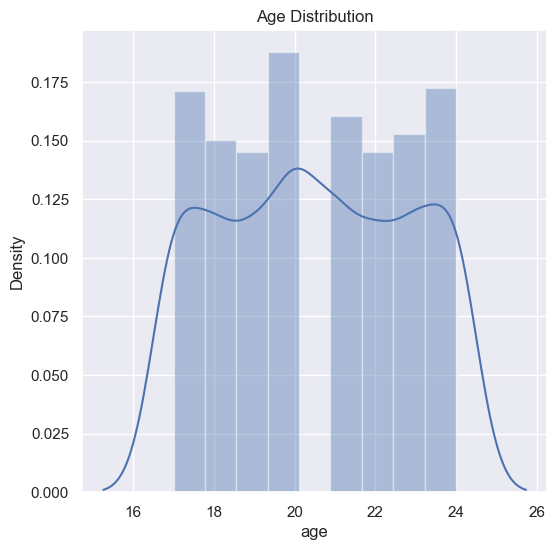

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(student_dataset['age'])
plt.title('Age Distribution')
plt.show()

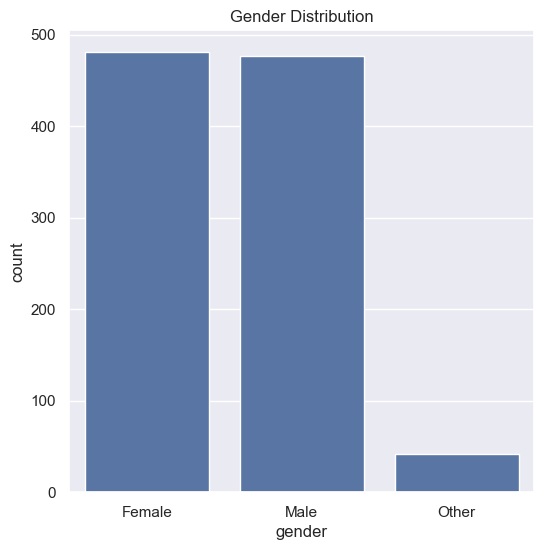

In [10]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='gender',data=student_dataset)
plt.title('Gender Distribution')
plt.show()


C:\Users\asadk\AppData\Local\Temp\ipykernel_10664\484637067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_dataset['study_hours_per_day'])


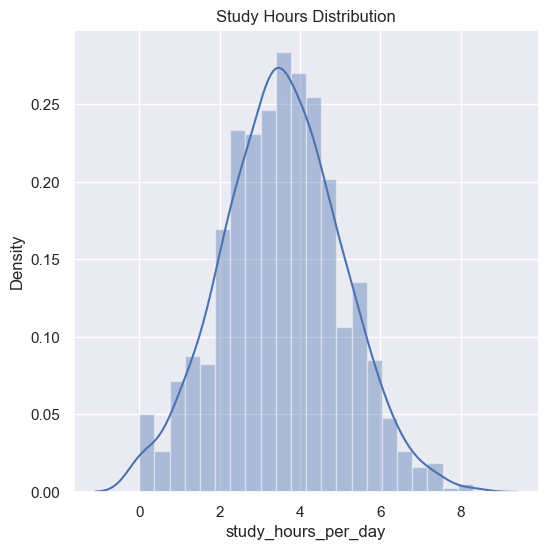

In [11]:
# study hours per day
plt.figure(figsize=(6,6))
sns.distplot(student_dataset['study_hours_per_day'])
plt.title('Study Hours Distribution')
plt.show()


C:\Users\asadk\AppData\Local\Temp\ipykernel_10664\2706536544.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_dataset['social_media_hours'])


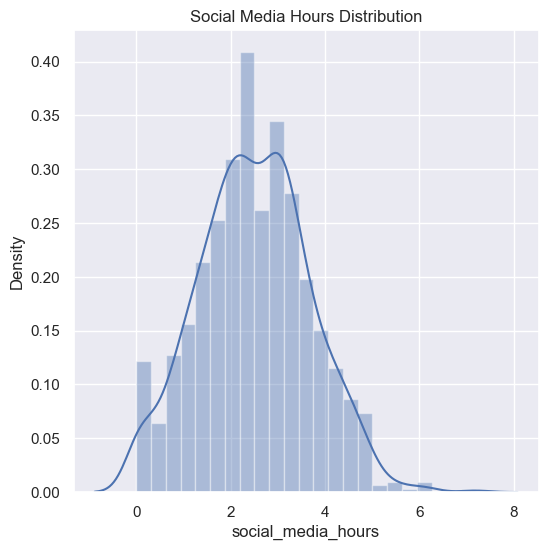

In [12]:
# social media hours
plt.figure(figsize=(6,6))
sns.distplot(student_dataset['social_media_hours'])
plt.title('Social Media Hours Distribution')
plt.show()

C:\Users\asadk\AppData\Local\Temp\ipykernel_10664\3365266650.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_dataset['netflix_hours'])


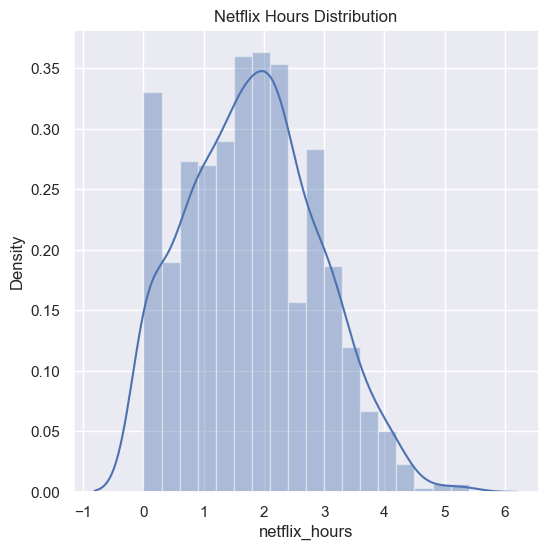

In [13]:
# netflix hours
plt.figure(figsize=(6,6))
sns.distplot(student_dataset['netflix_hours'])
plt.title('Netflix Hours Distribution')
plt.show()


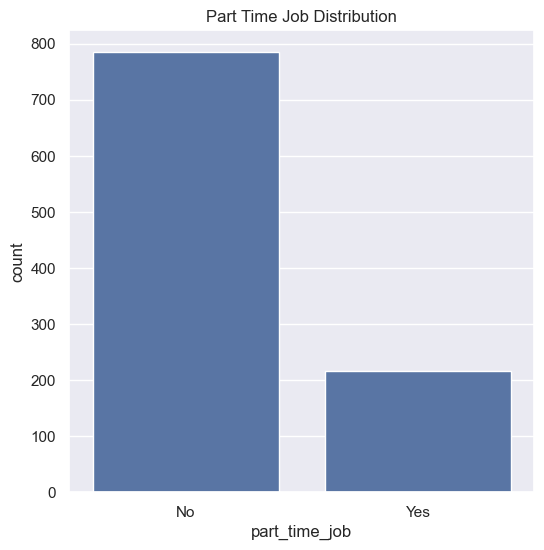

C:\Users\asadk\AppData\Local\Temp\ipykernel_10664\3822503438.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_dataset['attendance_percentage'])


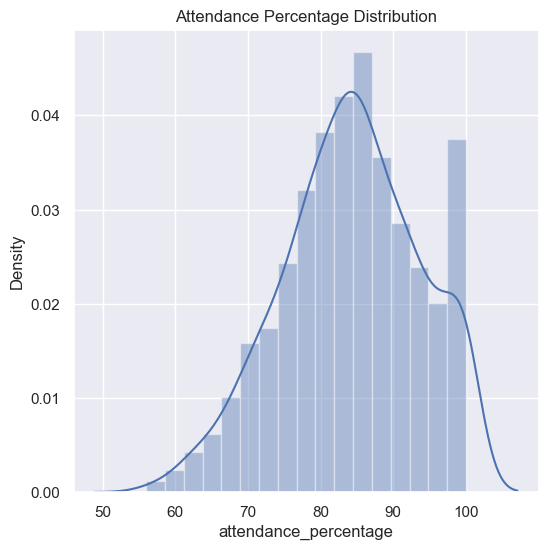

C:\Users\asadk\AppData\Local\Temp\ipykernel_10664\3822503438.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_dataset['sleep_hours'])


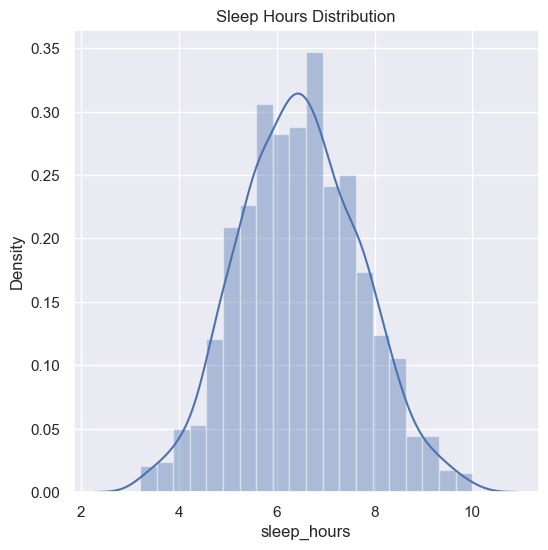

In [14]:
# part time job
plt.figure(figsize=(6,6))
sns.countplot(x='part_time_job',data=student_dataset)
plt.title('Part Time Job Distribution')
plt.show()

# attendance percentage
plt.figure(figsize=(6,6))
sns.distplot(student_dataset['attendance_percentage'])
plt.title('Attendance Percentage Distribution')
plt.show()

# sleep hours
plt.figure(figsize=(6,6))
sns.distplot(student_dataset['sleep_hours'])
plt.title('Sleep Hours Distribution')
plt.show()

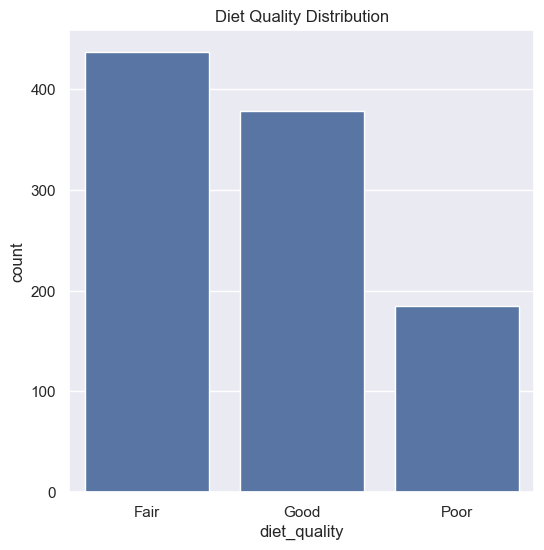

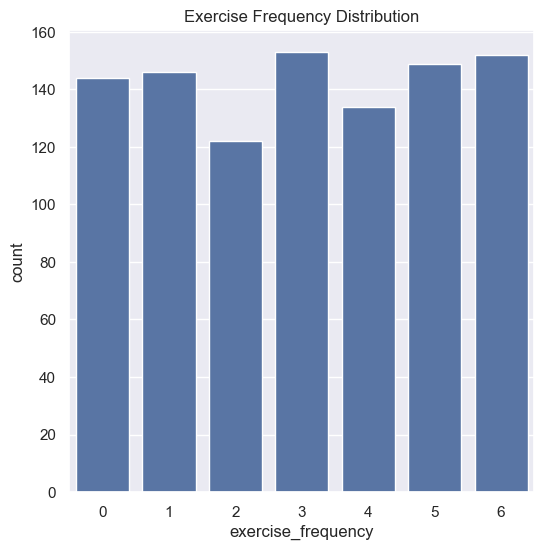

In [15]:
# diet quality
plt.figure(figsize=(6,6))
sns.countplot(x='diet_quality',data=student_dataset)
plt.title('Diet Quality Distribution')
plt.show()

# exercise frequency
plt.figure(figsize=(6,6))
sns.countplot(x='exercise_frequency',data=student_dataset)
plt.title('Exercise Frequency Distribution')
plt.show()

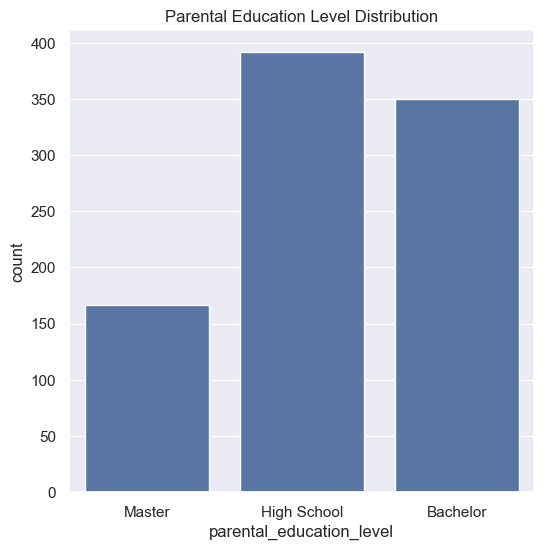

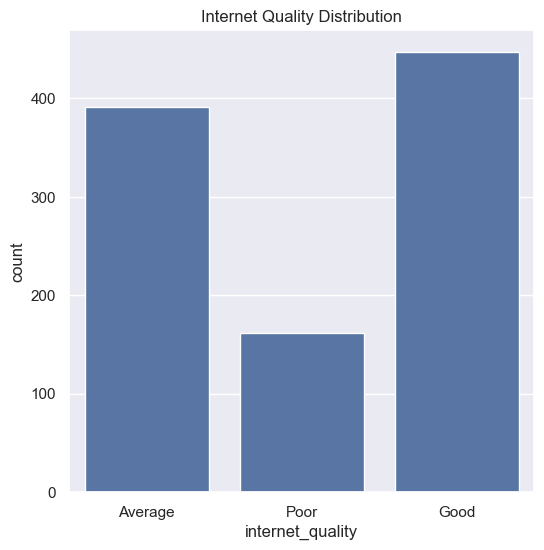

In [16]:
# parental education level
plt.figure(figsize=(6,6))
sns.countplot(x='parental_education_level',data=student_dataset)
plt.title('Parental Education Level Distribution')
plt.show()

# internet quality
plt.figure(figsize=(6,6))
sns.countplot(x='internet_quality',data=student_dataset)
plt.title('Internet Quality Distribution')
plt.show()

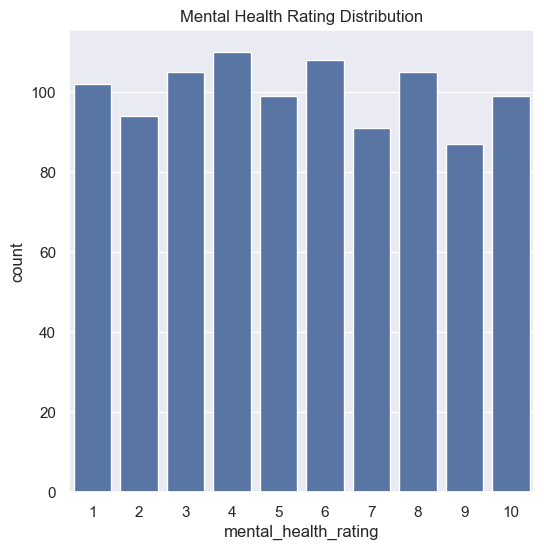

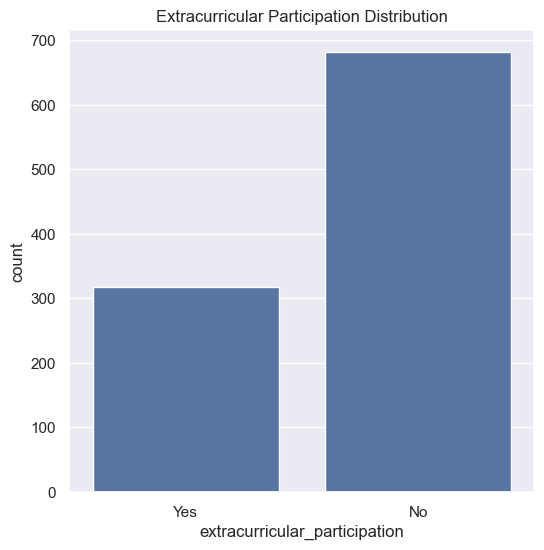

In [17]:
# mental health rating
plt.figure(figsize=(6,6))
sns.countplot(x='mental_health_rating',data=student_dataset)
plt.title('Mental Health Rating Distribution')
plt.show()

# extracurricular participation
plt.figure(figsize=(6,6))
sns.countplot(x='extracurricular_participation',data=student_dataset)
plt.title('Extracurricular Participation Distribution')
plt.show()

In [19]:
# encoding gender column
student_dataset.replace({'gender':{'Male':0, 'Female':1,'Other':2}},inplace=True)
# encoding part time job column
student_dataset.replace({'part_time_job':{'Yes':0, 'No':1}},inplace=True)
# encoding diet quality column
student_dataset.replace({'diet_quality':{'Fair':0,'Good':1,'Poor':2,}},inplace=True)
# encoding parential educationlevel
student_dataset.replace({'parental_education_level':{'Master':0, 'High School':1,'Bachelor':2}},inplace=True)
# encoding internat quality
student_dataset.replace({'internet_quality':{'Poor':0, 'Good':1,'Average':2}},inplace=True)
# encoding extracurricalr participatio rating
student_dataset.replace({'extracurricular_participation':{'Yes':0, 'No':1}},inplace=True)



In [21]:

student_dataset.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [23]:
student_id_cleaned = student_dataset.dropna()

In [24]:
student_dataset['parental_education_level'] = student_dataset['parental_education_level'].fillna(student_dataset['parental_education_level'].mean())

In [25]:
X=student_dataset.drop(columns='exam_score',axis=1)
Y=student_dataset['exam_score']

In [26]:
print(X)

     student_id  age  gender  study_hours_per_day  social_media_hours  \
0          1000   23       1                  0.0                 1.2   
1          1001   20       1                  6.9                 2.8   
2          1002   21       0                  1.4                 3.1   
3          1003   23       1                  1.0                 3.9   
4          1004   19       1                  5.0                 4.4   
..          ...  ...     ...                  ...                 ...   
995        1995   21       1                  2.6                 0.5   
996        1996   17       1                  2.9                 1.0   
997        1997   20       0                  3.0                 2.6   
998        1998   24       0                  5.4                 4.1   
999        1999   19       1                  4.3                 2.9   

     netflix_hours  part_time_job  attendance_percentage  sleep_hours  \
0              1.1              1                 

In [27]:
print(Y)

0       56.2
1      100.0
2       34.3
3       26.8
4       66.4
       ...  
995     76.1
996     65.9
997     64.4
998     69.7
999     74.9
Name: exam_score, Length: 1000, dtype: float64


In [28]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)#0.2 means 20% of data is used for test and remaining 80 % is used for train

print(X.shape,X_train.shape,X_test.shape)

(1000, 15) (800, 15) (200, 15)


In [30]:
# loading knn regression model
knn=KNeighborsRegressor(n_neighbors=5)
print(X_train.dtypes)

student_id                         int64
age                                int64
gender                             int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int64
exercise_frequency                 int64
parental_education_level         float64
internet_quality                   int64
mental_health_rating               int64
extracurricular_participation      int64
dtype: object


In [31]:
X_train.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
175,1175,22,2,3.0,3.2,0.3,1,100.0,5.0,1,3,0.00000,1,7,1
818,1818,20,0,2.3,3.2,2.4,1,83.0,4.2,0,6,2.00000,0,1,0
677,1677,24,0,3.7,4.5,2.2,1,85.9,9.1,1,3,1.20132,1,5,1
952,1952,21,1,3.6,2.1,3.5,0,62.3,5.7,2,1,1.00000,2,9,1
200,1200,23,1,3.5,1.3,0.5,1,89.8,7.8,0,2,2.00000,1,7,1


In [32]:
X_train.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
dtype: int64

In [33]:
knn.fit(X_train,Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
training_Data_prediction=knn.predict(X_train)


In [35]:
# R  squared value in range [0, 1]
r2_train=metrics.r2_score(Y_train,training_Data_prediction)
print('R squared value for training data: ', r2_train)

R squared value for training data:  0.2507901646617696


In [36]:
# prediction on test data
test_Data_prediction=knn.predict(X_test)

r2_test=metrics.r2_score(Y_test,test_Data_prediction)
print('R squared value for training data: ', r2_test)

R squared value for training data:  -0.09102180369432311


In [37]:
input_data=(1000,23,1,0.0,1.2,1.1,1,85.0,8.0,0,6,0,2,8,0)
# changing the input data to a tuple
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=knn.predict(input_data_reshaped)

print(prediction)

[69.34]


c:\Users\asadk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [38]:
print("The insurance cost is USD : ",prediction[0])

The insurance cost is USD :  69.34


In [39]:
# loading linear regression model
regressor=LinearRegression()

In [40]:
regressor.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
# prediction on training data
training_Data_prediction=regressor.predict(X_train)

In [42]:
# R  squared value in range [0, 1]
r2_train=metrics.r2_score(Y_train,training_Data_prediction)
print('R squared value for training data: ', r2_train)

R squared value for training data:  0.9032149090351415


In [43]:
# prediction on test data
test_Data_prediction=regressor.predict(X_test)

r2_test=metrics.r2_score(Y_test,test_Data_prediction)
print('R squared value for training data: ', r2_test)

R squared value for training data:  0.8911240467312112


In [44]:
input_data=(1001,20,1,6.9,2.8,2.3,1,97.3,4.6,1,6, 1,2,8,1)
# changing the input data to a tup
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)

print(prediction)

print("The insurance cost is USD : ",prediction[0])

[108.31070283]
The insurance cost is USD :  108.31070282694594


c:\Users\asadk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
